# 1. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

--------------------
### 학습 목표

* 학습의 입력과 라벨, 출력인 예측값으로 진행하는 철학을 이해.
* 손실함수 이해와 구현.
* 손실함수를 줄이기 위한 미분의 수치미분과 해석미분을 실행.
* 경사하강법 활용하여 모델을 학습, 선형 회귀 프로세스를 경험.
* sklearn의 LinearRegression을 활용해 빠르고 간편하게 선형 회귀 하는 방법을 익힙니다.

--------------------



In [ ]:
from IPython.display import display, Image

## 1-2. 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기

### (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기


In [ ]:
#  데이터 준비
import pandas as pd

macbook = pd.read_csv('/content/drive/MyDrive/Aiffel_Nodes/data_preprocess/bike_regression_data/macbook.csv')

print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


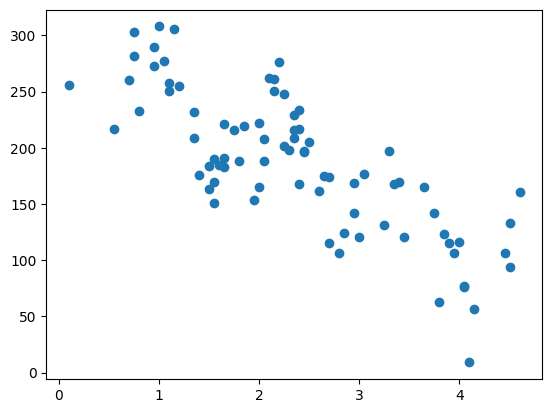

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

위 그래프는 음의 상관관계를 띄고있다. 

* 상관관계를 나타내는 피어슨(Pearson) 상관 계수는 다음과 같다.   
![피어슨 상관계수](https://d3s0tskafalll9.cloudfront.net/media/images/E-7-2.max-800x600_ELGrbw8.png)   



#### 상관 계수 구하기

Numpy의 `np.corrcoef(x, y)`를 사용하여 상관계수를 사용한다.

In [ ]:
import numpy as np

# np.corrcoef(x, y)
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

### (2) "모델"을 만든다는 것, 그 의미 이해하기

사용 연도`user_years`값을 입력받으면 중고가격이 얼마정도인지 예측하는 모델을 만들어 본다.

#### 풀고자 하는 문제 정의
  * 사용 연수를 입력!
  * 중고가를 예측!
  

In [ ]:
# 입력값과 라벨y를 설정
x = macbook['used_years'].values
y = macbook['price'].values

# 모델 정의 (일차함수 모델)
def model(x, w, b):
  o = w*x + b
  return o

위 의 일차함수 모델의 학습은 x의 데이터가 들어왔을 때 최적의 w와 b를 찾기 위한 과정이고 훈련 집합으로 예측된 output값과 라벨간의 오차를 줄이는 것이다.


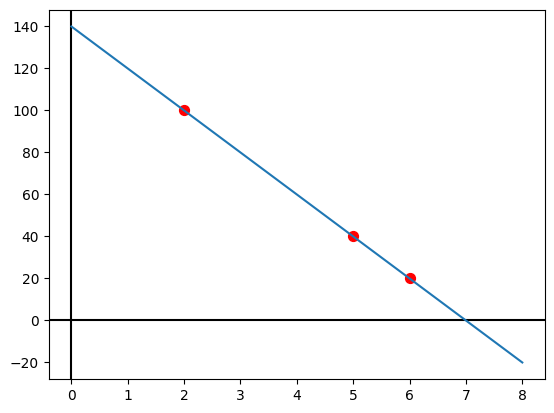

In [ ]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# o = wx + b
x = np.linspace(0, 8, 9)
o = model(x, w=-20, b=140) #y = -20x + 140
plt.plot(o)

# (x, o) 점 찍기
x_data = [2, 5, 6]
o_data = [100, 40, 20]
plt.scatter(x_data, o_data, c='r', s=50)

plt.show()

#### 오차를 최소화하는 모델

위의 macbook의 데이터들을 지나는 적절한 직선을 찾아야한다. 즉, 데이터들을 아우르며 지나는 직선 하나의 파라미터 기울기와 절편을 최적으로 찾아보자.

### (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기

최적의 파라미터를 찾기 위해 우리는 손실함수 실제 정답과 출력값의 차이를 계산하고 파라미터를 수정하며 차이를 줄여나가야 한다.



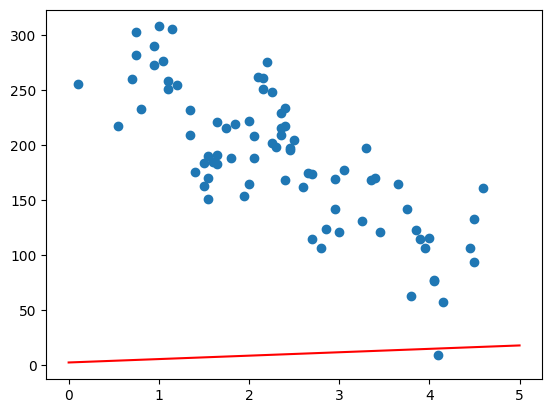

In [ ]:
# 아직 우리는 기울기와 절편 즉, 파라미터를 알지 못한다. 
# 랜덤한 값을 넣는다.
w = 3.1 
b = 2.3 

# 위에 설정한 랜덤한 파라미터로 그려진 선을 그려본다.
x = np.linspace(0, 5, 6)
o = model(x, w, b) # y = 3.1x + 2.3
plt.plot(o, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

#### 정답과 예측값의 차이



In [ ]:
# 현제 파라미터로 추출된 예측값을 데이터프레임에 넣어본다.
x = macbook["used_years"].values
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
macbook['prediction'] = prediction

# 예측값과 라벨의 차이를 저장한다.
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [ ]:
# RMSE(Root Mean Squared Error)
def RMSE(a,b):
  mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
  rmse = mse ** 0.5        # MSE의 제곱근
  return rmse

# 데이터 불러오기
x = macbook["used_years"].values
y = macbook["price"].values

# 모델에 널어 예측
predictions = model(x, w, b)

# 오차 확인
rmse = RMSE(predictions, y)

rmse

188.81322969819274

#### 모델의 예측값과 정답값의 차이를 계산하는 손실함수(loss function), 또는 비용함수(cost function) 

In [ ]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

### (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!

#### 기울기와 경사하강법(Gradient Descent)

![최적의 파라미터 기울기로 구하기](https://d3s0tskafalll9.cloudfront.net/media/images/E-7-5.max-800x600_JhLxNuH.png)   

이를 구하기 위한 식을 쓰면 다음과 같다.

$$\hat{w}=w-\alpha g$$

  * where,$\hat{w}$는 새로운 가중치, $\alpha$는 학습률이며 학습의 세기?를 결정, $g$는 그래디언트, 기울기를 의미한다.
  

#### 미분으로 그래디언트 구하기

코드에 사용할 미분식을 적어보자

$$dw=\lim_{\Delta x→0}\frac{f(w+Δx)-f(w)}{Δx}$$
$$db=\lim_{\Delta x→0}\frac{f(b+Δx)-f(b)}{Δx}$$

In [ ]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

### (5) 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!

> 1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 $\hat{w}=w−\alpha g, \hat{b}=b−\alpha g$ 로 업데이트
6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복


In [ ]:
# 하이퍼 파라미터 설정(사용자가 설정하는 파라미)
lr = 1  # α

# 1. 데이터 준비
x = macbook["used_years"].values
y = macbook["price"].values

# 2. 초기 파라미터 랜덤하게 설정
w = 3.1
b = 2.3

# 손실함수 저장할 리스트
losses = []

for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= lr * dw         # 5번: w = w - α * dw 로 업데이트
    b -= lr * db         # 5번: b = b - α * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


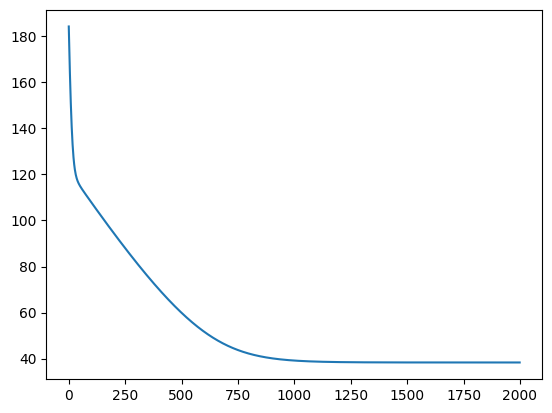

In [ ]:
# 손실함수 확인 
plt.plot(losses)
plt.show()

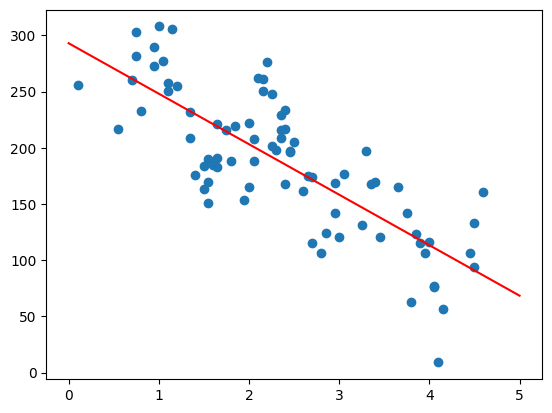

In [ ]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x와 학습한 w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")

# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [ ]:
# test데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/Aiffel_Nodes/data_preprocess/bike_regression_data/macbook.csv')

print(test.shape)

(80, 2)


In [ ]:
# 데이터를 변수에 저장
test_x = test['used_years'].values
test_y = test['price'].values

# 훈련데이터로 학습한 모델에 데이터 입력 
prediction = model(test_x, w, b)

# 예측 값과 에러를 데이터 베이스에 넣어 확인해보기 
test['prediction'] = prediction
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,2.65,175,174.023542,0.976458
1,3.80,63,122.356847,-59.356847
2,0.95,273,250.400396,22.599604
3,4.50,133,90.907555,42.092445
4,4.45,106,93.153933,12.846067
...,...,...,...,...
75,1.50,184,225.690237,-41.690237
76,1.65,191,218.951103,-27.951103
77,1.10,251,243.661262,7.338738
78,3.25,131,147.067006,-16.067006


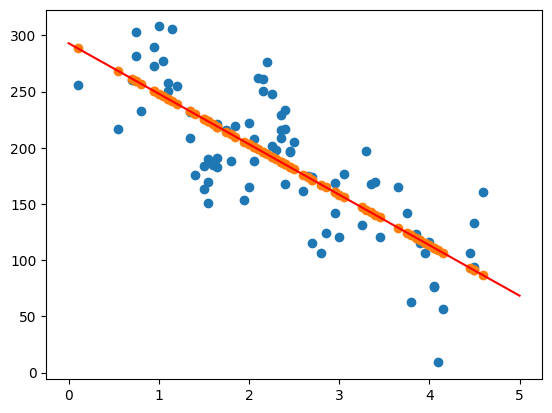

In [ ]:
plt.figure()
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

## 1-7. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 

### (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?
